Завдання 1

Модифікована система рівнянь має вигляд:

\begin{cases}
\frac{dx}{dt} = \alpha x - \beta x y \\\\
\frac{dy}{dt} = \delta x y - \gamma y - \mu y^2
\end{cases}


де:

- $x(t)$ — популяція жертв;
- $y(t)$ — популяція хижаків;
- $\alpha$ — коефіцієнт росту жертв;
- $\beta$ — коефіцієнт «успішності» хижаків;
- $\delta$ — ефективність використання жертв хижаками;
- $\gamma$ — смертність хижаків;
- $\mu$ — інтенсивність конкуренції між хижаками (**новий параметр**).

---

## Інтерпретація модифікації

- $\mu y^2$ вводить **нелінійне гальмування** зростання хижаків за рахунок **конкуренції між ними**.
- Це ускладнює систему, робить її **неавтономною** і створює передумови до **нелінійних і хаотичних режимів**.


In [4]:
# Дослідження хаотичної динаміки у модифікованій моделі Лотки–Вольтерра

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

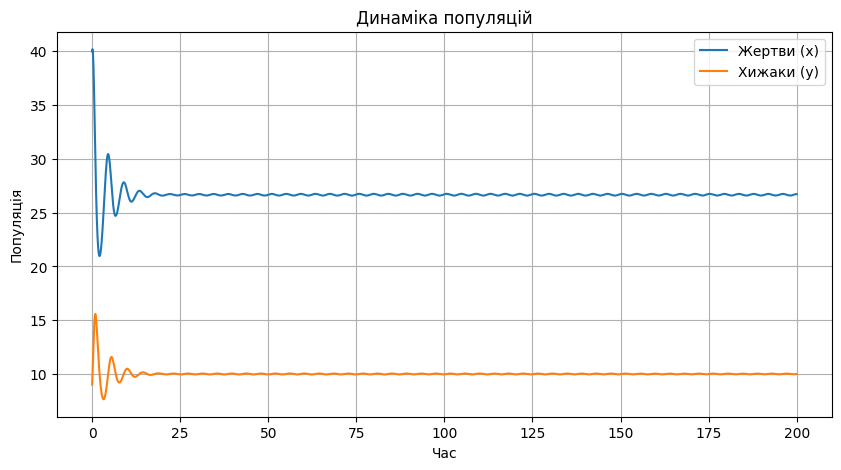

In [5]:
# Параметри моделі
alpha = 1.0
beta = 0.1
delta = 0.075
gamma = 1.5
mu = 0.05
x0, y0 = 40.0, 9.0

# Модифікована модель Лотки–Вольтерра з конкуренцією між хижаками
def lotka_volterra_modified(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y - mu * y**2
    return [dxdt, dydt]

# Моделювання
T = 200
n_steps = 5000
t_eval = np.linspace(0, T, n_steps)
sol = solve_ivp(lotka_volterra_modified, [0, T], [x0, y0], t_eval=t_eval)

# Візуалізація динаміки
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Жертви (x)')
plt.plot(sol.t, sol.y[1], label='Хижаки (y)')
plt.xlabel('Час')
plt.ylabel('Популяція')
plt.legend()
plt.title('Динаміка популяцій')
plt.grid(True)
plt.show()

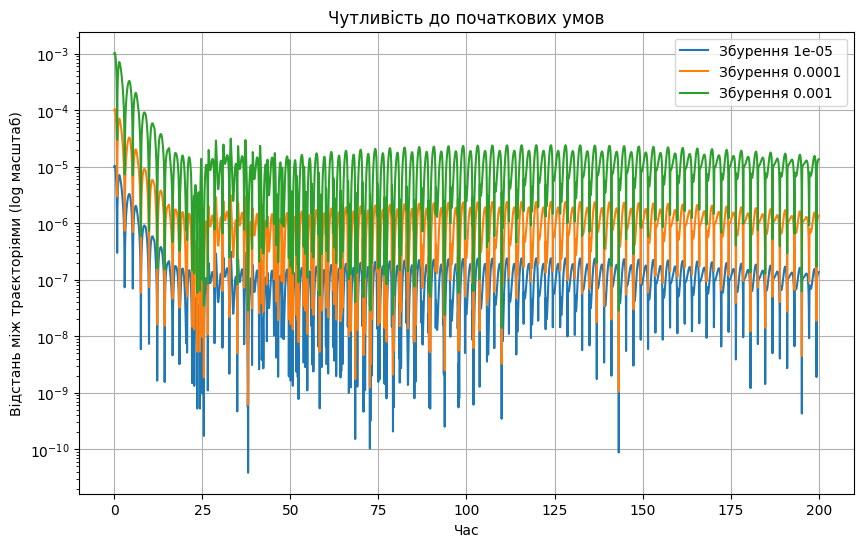

In [6]:

# Аналіз чутливості до початкових умов
perturbations = [1e-5, 1e-4, 1e-3]
t_vals, base_sol = t_eval, sol.y[1]
trajectories = [base_sol]

for p in perturbations:
    sol_pert = solve_ivp(lotka_volterra_modified, [0, T], [x0, y0 + p], t_eval=t_eval)
    trajectories.append(sol_pert.y[1])

# Обчислення відстаней
plt.figure(figsize=(10, 6))
for i, traj in enumerate(trajectories[1:]):
    dist = np.abs(trajectories[0] - traj)
    plt.semilogy(t_vals, dist, label=f"Збурення {perturbations[i]}")
plt.xlabel("Час")
plt.ylabel("Відстань між траєкторіями (log масштаб)")
plt.title("Чутливість до початкових умов")
plt.legend()
plt.grid()
plt.show()


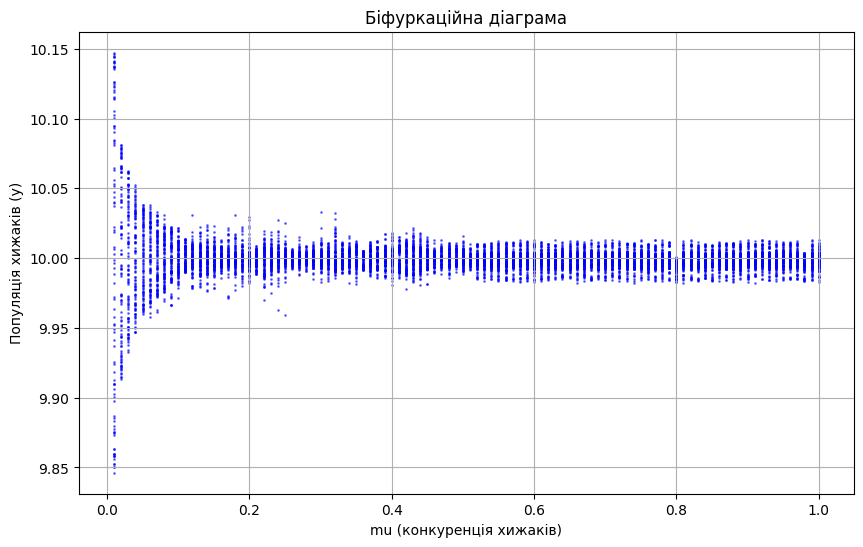

In [7]:
# Побудова біфуркаційної діаграми за параметром mu
def build_bifurcation(param_range, param_name):
    bifurcation_params = []
    bifurcation_values = []

    for val in param_range:
        def model(t, z):
            x, y = z
            dxdt = alpha * x - beta * x * y
            dydt = delta * x * y - gamma * y - val * y**2
            return [dxdt, dydt]

        sol = solve_ivp(model, [0, T], [x0, y0], t_eval=np.linspace(T*0.75, T, 1000))
        for y in sol.y[1][::10]:
            bifurcation_params.append(val)
            bifurcation_values.append(y)

    return np.array(bifurcation_params), np.array(bifurcation_values)

mu_range = np.linspace(0.01, 1.0, 100)
mu_vals, y_vals = build_bifurcation(mu_range, 'mu')

plt.figure(figsize=(10, 6))
plt.scatter(mu_vals, y_vals, s=1, c='blue', alpha=0.5)
plt.xlabel('mu (конкуренція хижаків)')
plt.ylabel('Популяція хижаків (y)')
plt.title('Біфуркаційна діаграма')
plt.grid()
plt.show()

In [8]:
# Оцінка показника Ляпунова
perturbation = 1e-5
sol1 = solve_ivp(lotka_volterra_modified, [0, T], [x0, y0], t_eval=t_eval)
sol2 = solve_ivp(lotka_volterra_modified, [0, T], [x0, y0 + perturbation], t_eval=t_eval)
distances = np.abs(sol1.y[1] - sol2.y[1])

def estimate_lyapunov(times, distances, skip=10):
    log_d = np.log(distances[skip:])
    t = times[skip:]
    A = np.vstack([t, np.ones(len(t))]).T
    slope, _ = np.linalg.lstsq(A, log_d, rcond=None)[0]
    return slope

lyapunov_exponent = estimate_lyapunov(t_eval, distances)
print(f"Оцінений найбільший показник Ляпунова: λ = {lyapunov_exponent:.4f}")
if lyapunov_exponent > 0:
    print("Система демонструє хаотичну поведінку (λ > 0).")
else:
    print("Система не демонструє хаотичну поведінку (λ ≤ 0).")


Оцінений найбільший показник Ляпунова: λ = -0.0007
Система не демонструє хаотичну поведінку (λ ≤ 0).


Завдання 2

In [ ]:
# Параметри моделі
r = 1.0
K = 100.0
y0 = 10.0
t_span = (0, 10)
n_steps = 1000
T = t_span[1]
dt = T / n_steps

# ------------------------
# Детермінована модель
# ------------------------
def logistic_model(t, y):
    return r * y * (1 - y / K)

t_eval = np.linspace(t_span[0], T, 100)
solution = solve_ivp(logistic_model, t_span, [y0], t_eval=t_eval)
y_det = solution.y[0]
analytical_solution = K / (1 + ((K - y0) / y0) * np.exp(-r * t_eval))

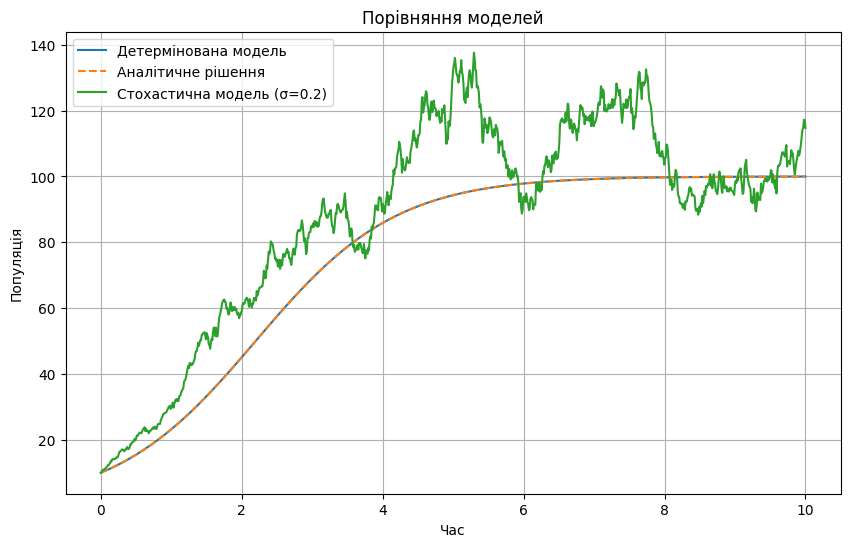

In [10]:
# Стохастична модель (Euler-Maruyama)
def simulate_logistic_stochastic(sigma, seed=None):
    if seed is not None:
        np.random.seed(seed)
    t_stoch = np.linspace(t_span[0], T, n_steps)
    y_stoch = np.zeros(n_steps)
    y_stoch[0] = y0
    for i in range(1, n_steps):
        dW = np.random.normal(0, np.sqrt(dt))
        y_stoch[i] = y_stoch[i-1] + r * y_stoch[i-1] * (1 - y_stoch[i-1] / K) * dt + sigma * y_stoch[i-1] * dW
    return t_stoch, y_stoch

sigma_example = 0.2
t_stoch, y_stoch = simulate_logistic_stochastic(sigma_example)

plt.figure(figsize=(10, 6))
plt.plot(t_eval, y_det, label="Детермінована модель")
plt.plot(t_eval, analytical_solution, '--', label="Аналітичне рішення")
plt.plot(t_stoch, y_stoch, label=f"Стохастична модель (σ={sigma_example})")
plt.xlabel("Час")
plt.ylabel("Популяція")
plt.title("Порівняння моделей")
plt.legend()
plt.grid(True)
plt.show()


Sigma = 0.01 -> Fractal dimension ≈ 0.198
Sigma = 0.05 -> Fractal dimension ≈ 0.249
Sigma = 0.10 -> Fractal dimension ≈ 0.284
Sigma = 0.20 -> Fractal dimension ≈ 0.317
Sigma = 0.50 -> Fractal dimension ≈ 0.344
Sigma = 1.00 -> Fractal dimension ≈ 0.329


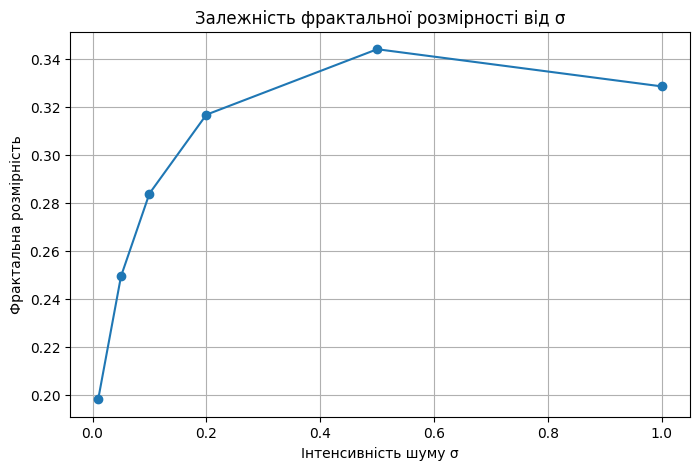

In [11]:
# Box-counting для фрактальної розмірності
def box_counting(ts, n_scales=10):
    ts = np.asarray(ts)
    N = len(ts)
    sizes = np.logspace(np.log10(2), np.log10(N/2), num=n_scales, dtype=int)
    counts = []
    for size in sizes:
        count = 0
        for i in range(0, N, size):
            segment = ts[i:i+size]
            if len(segment) > 0:
                min_val, max_val = np.min(segment), np.max(segment)
                count += int(np.ceil((max_val - min_val) / (np.std(ts) * 1e-2))) + 1
        counts.append(count)
    log_sizes = -np.log(sizes)
    log_counts = np.log(counts)
    coeffs = np.polyfit(log_sizes, log_counts, 1)
    return coeffs[0]

# Аналіз впливу шуму
sigma_vals = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
dimensions = []

for sigma in sigma_vals:
    _, y = simulate_logistic_stochastic(sigma, seed=42)
    dim = box_counting(y)
    dimensions.append(dim)
    print(f"Sigma = {sigma:.2f} -> Fractal dimension ≈ {dim:.3f}")

# Графік фрактальної розмірності
plt.figure(figsize=(8, 5))
plt.plot(sigma_vals, dimensions, marker='o')
plt.xlabel("Інтенсивність шуму σ")
plt.ylabel("Фрактальна розмірність")
plt.title("Залежність фрактальної розмірності від σ")
plt.grid(True)
plt.show()

Зі зростанням $\sigma$, фрактальна розмірність зростає. Це означає, що траєкторії стають «грубіші», менш гладкі та більш хаотичні.